# Импортирование библиотек

In [147]:
import sklearn
import csv
import numpy as np
from numpy import genfromtxt
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Загрузка входных данных

In [148]:
data = pandas.read_csv('data/bank.csv', delimiter=',', header=0)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


# Кодирование категориальных признаков (one hot кодирование)
## Категориальные признаки

In [149]:
categorial = pandas.DataFrame()
for c in ['job', 'marital', 'education', 'contact', 'month', 'poutcome']:
    categorial = pandas.concat([categorial, pandas.get_dummies(data[c], prefix=c)], axis=1)
categorial

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4517,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4518,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4519,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Бинарные признаки

In [150]:
binary = pandas.DataFrame()
for c in ['default', 'housing', 'loan', 'y']:
    binary = pandas.concat([binary, data[c].map({'yes': 1, 'no': 0})], axis=1)
binary

,default,housing,loan,y
0,0,0,0,0
1,0,1,1,0
2,0,1,0,0
3,0,1,1,0
4,0,1,0,0
...,...,...,...,...
4516,0,1,0,0
4517,1,1,1,0
4518,0,0,0,0
4519,0,0,0,0


## Объединение всех обработанных данных

In [151]:
prepared = data[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].join(binary).join(categorial)
prepared

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,1,1,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4517,57,-3313,9,153,1,-1,0,1,1,1,...,0,0,1,0,0,0,0,0,0,1
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4519,28,1137,6,129,4,211,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Разделение данных на обучающую и тестовую выборки

In [152]:
x = prepared.drop('y', 1)
y = prepared[['y']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


# Логистическая регрессия
## Вычисление параметров модели

In [153]:
lr_clf = LogisticRegression(random_state=0).fit(x_train, y_train)

## Оценка модели для обучающей выборки

In [154]:
lr_train_score = lr_clf.score(x_train, y_train)
lr_train_score

0.9012875536480687

## Оценка модели для тестовой выборки

In [155]:
lr_test_score = lr_clf.score(x_test, y_test)
lr_test_score

0.8853887399463807

## Вычисление метрик

In [156]:
y_pred = lr_clf.predict(x_test)
lr_tn, lr_fp, lr_fn, lr_tp = sklearn.metrics.confusion_matrix(y_test, y_pred).ravel()
lr_precision = sklearn.metrics.precision_score(y_test, y_pred)
lr_recall = sklearn.metrics.recall_score(y_test, y_pred)
lr_accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f'TN: {lr_tn}, FP: {lr_fp}, FN: {lr_fn}, TP: {lr_tp}')
print(f'precision: {lr_precision}, recall: {lr_recall}, accuracy: {lr_accuracy}')

TN: 1278, FP: 29, FN: 142, TP: 43
precision: 0.5972222222222222, recall: 0.23243243243243245, accuracy: 0.8853887399463807


## Построение графика логистической регрессии

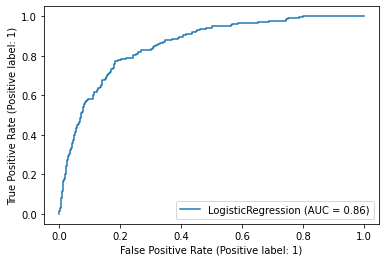

In [157]:
lr_roc_display = sklearn.metrics.plot_roc_curve(lr_clf, x_test, y_test)

# Метод опорных векторов
## Вычисление параметров модели

In [158]:
svm_clf = svm.LinearSVC(random_state=2).fit(x_train, y_train)

## Оценка модели для обучающей выборки

In [160]:
svm_train_score = svm_clf.score(x_train, y_train)
svm_train_score

0.8669527896995708

## Оценка модели для тестовой выборки

In [162]:
svm_test_score = svm_clf.score(x_test, y_test)
svm_test_score

0.8518766756032171

## Вычисление метрик

In [163]:
y_pred = svm_clf.predict(x_test)
svm_tn, svm_fp, svm_fn, svm_tp = sklearn.metrics.confusion_matrix(y_test, y_pred).ravel()
svm_precision = sklearn.metrics.precision_score(y_test, y_pred)
svm_recall = sklearn.metrics.recall_score(y_test, y_pred)
svm_accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f'TN: {svm_tn}, FP: {svm_fp}, FN: {svm_fn}, TP: {svm_tp}')
print(f'precision: {svm_precision}, recall: {svm_recall}, accuracy: {svm_accuracy}')

TN: 1236, FP: 71, FN: 150, TP: 35
precision: 0.330188679245283, recall: 0.1891891891891892, accuracy: 0.8518766756032171


## Построение графика логистической регрессии

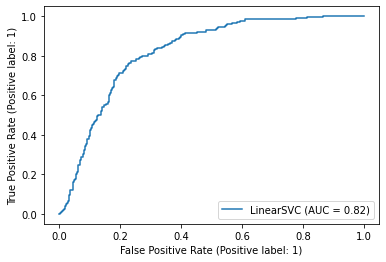

In [164]:
svm_roc_display = sklearn.metrics.plot_roc_curve(svm_clf, x_test, y_test)

# Сравнение

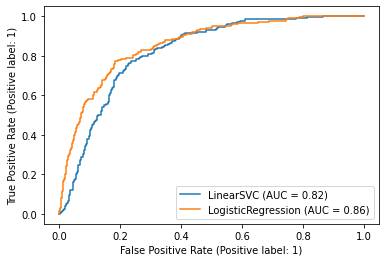

In [165]:
ax = plt.gca()
svm_roc_display.plot(ax=ax)
lr_roc_display.plot(ax=ax)

In [166]:
metrics = {
    'Models':['Logistic Regression', 'SVM'],
    'TN': [lr_tn, svm_tn], 'FP': [lr_fp, svm_fp], 'FN': [lr_fn, svm_fn], 'TP': [lr_tp, svm_tp],
    'Precision': [lr_precision, svm_precision], 'Recall': [lr_recall, svm_recall],'Accuracy': [lr_accuracy, svm_accuracy]
}
comparison = pandas.DataFrame.from_dict(metrics)
comparison.set_index('Models')

,TN,FP,FN,TP,Precision,Recall,Accuracy
Models,,,,,,,
Logistic Regression,1278,29,142,43,0.597222,0.232432,0.885389
SVM,1236,71,150,35,0.330189,0.189189,0.851877
